# Regression multiple

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

On trace ici deux graphiques, pour les deux variables des données, par rapport à notre variable cible.

In [2]:
# Generate some data
np.random.seed(10)
n = 30
X = np.random.normal(size=(n, 2))
y = 2 + 3*X[:, 0] + 4*X[:, 1]

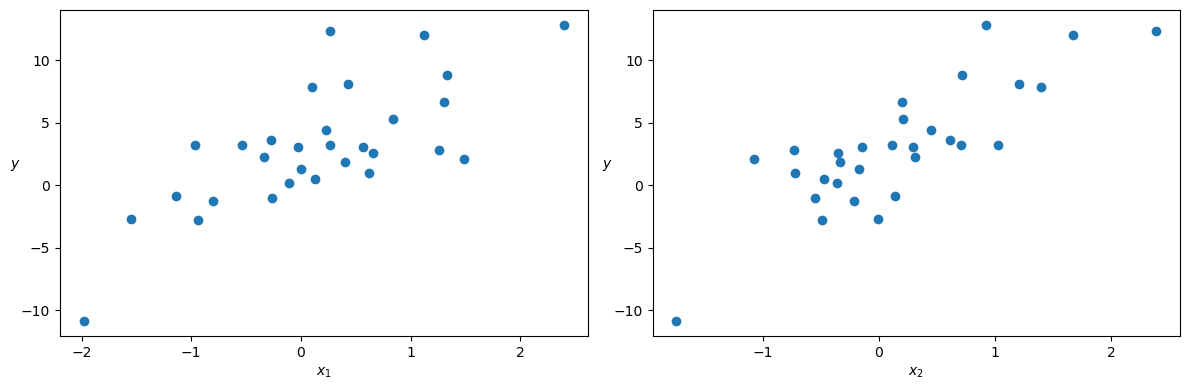

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(X[:, 0], y)
ax[0].set_xlabel("$x_1$")
ax[0].set_ylabel("$y$", rotation=0)

ax[1].scatter(X[:, 1], y)
ax[1].set_xlabel("$x_2$")
ax[1].set_ylabel("$y$", rotation=0)

plt.tight_layout()
plt.show()

On remarque qu'il serait difficile de tracer une droite qui pourrait bien représenter la relation entre les variables et la variable cible. Cependant, si on trace les points en 3D, on peut voir que la relation entre les variables et la variable cible est plus linéaire. Cela signifie que nous pourrions utiliser une régression multiple pour modéliser cette relation.

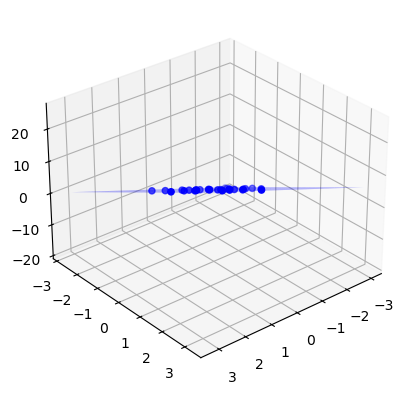

In [4]:
# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Create a grid of values for the regression plane
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
                       np.arange(x2_min, x2_max, 0.2))

# Predict values for the regression plane
Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o')

# Plot the regression plane
ax.plot_surface(xx1, xx2, Z, alpha=0.3, color='b')

# Change the viewpoint
ax.view_init(elev=29., azim=50.)

plt.show()


Pour trouver les meilleures paramètres de la régression multiple, nous allons utiliser la descente de gradient. 
On peut par exemple voir l'évolution du plan de regression en fonction de l'évolution des paramètres.

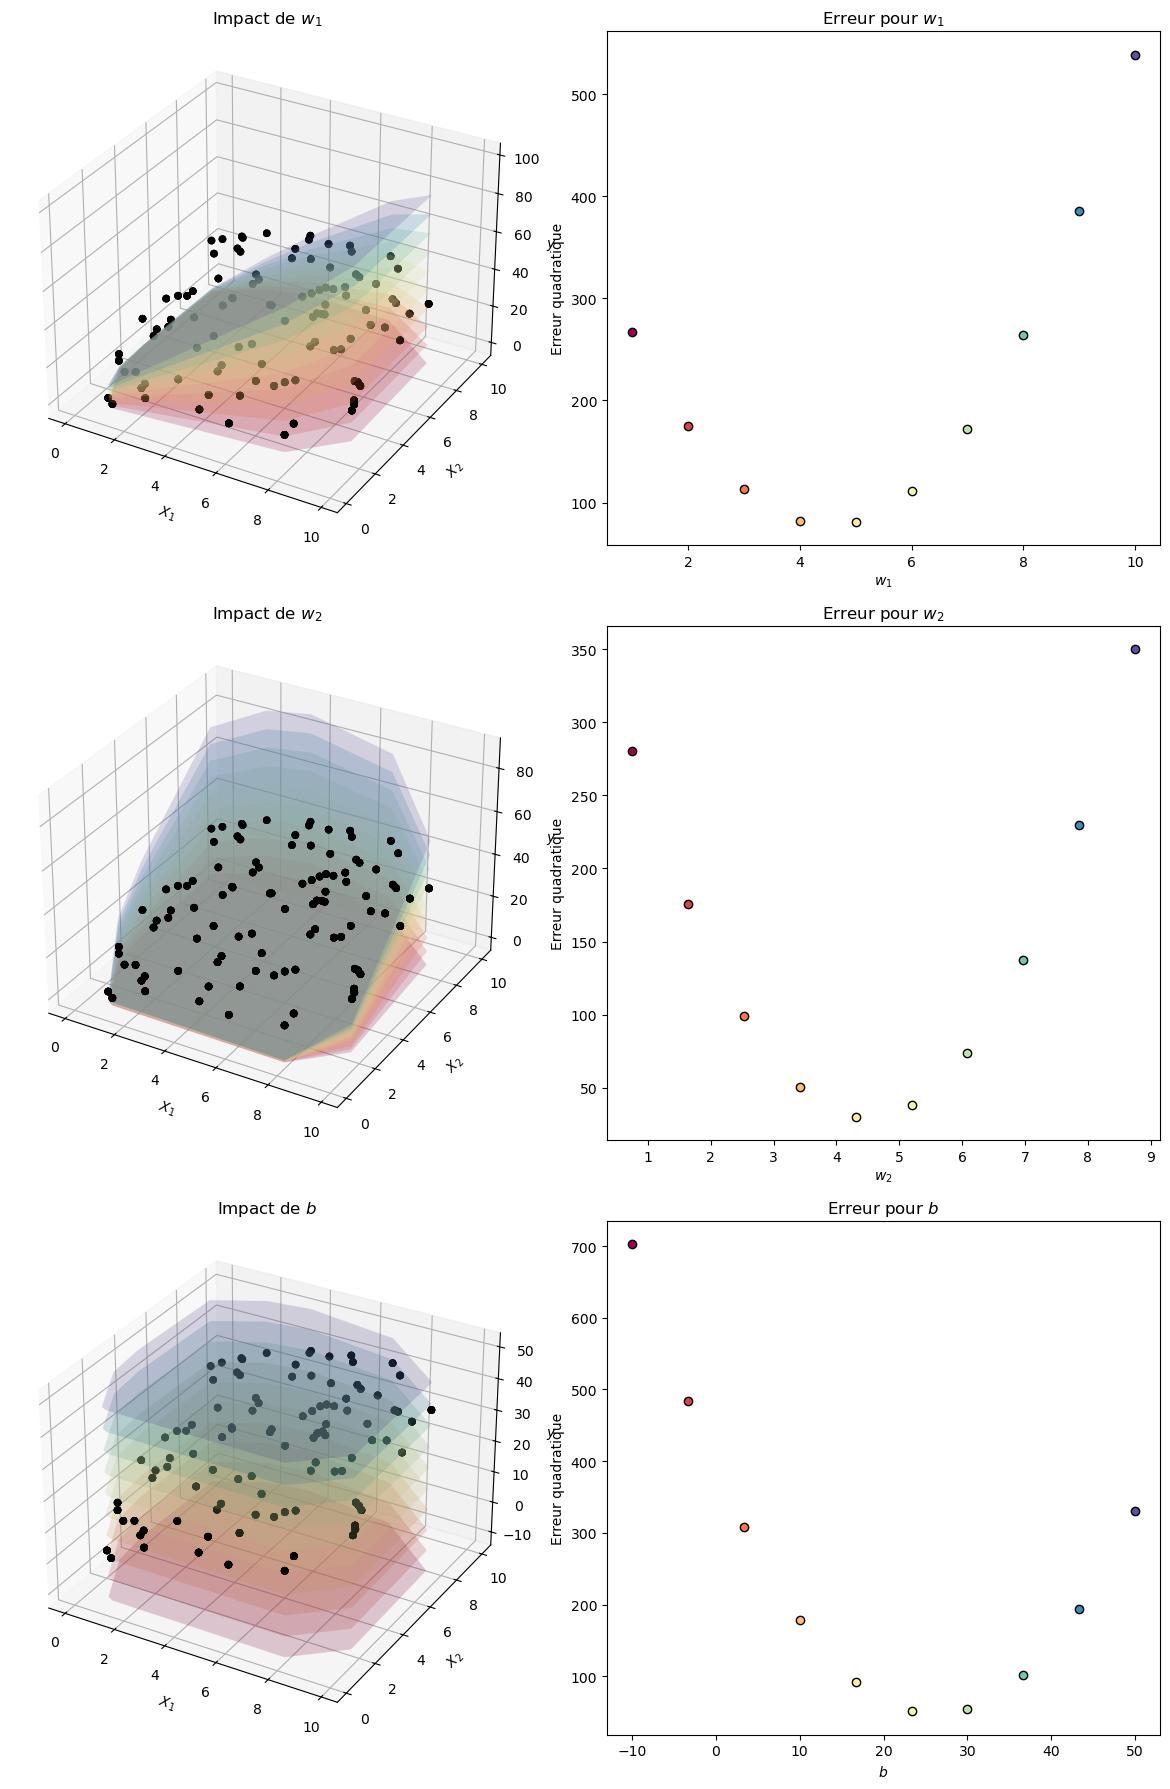

In [5]:
np.random.seed(0)
m = 100
X1 = np.random.rand(m) * 10
X2 = np.random.rand(m) * 10
y = 2 * X1 + 3 * X2 + 1 + np.random.randn(m)
n_linspace = 10

# Créer un modèle de régression linéaire
w1, w2, b = 0, 0, 0

# Visualiser l'impact de w1, w2, et b
fig = plt.figure(figsize=(12, 18))

# Impact de w1
ax1 = fig.add_subplot(321, projection='3d')
ax2 = fig.add_subplot(322)
list_w1 = np.linspace(1, 10, n_linspace)
color = iter(plt.cm.Spectral(np.linspace(0, 1, len(list_w1))))

for w1 in list_w1:
    pred = w1 * X1 + w2 * X2 + b
    c = next(color)
    ax1.scatter(X1, X2, y, c='k', zorder=1)
    ax1.plot_trisurf(X1, X2, pred, color=c, alpha=0.2)
    L = 1/(2*m) * np.sum((pred - y)**2)
    ax2.scatter(w1, L, color=c, edgecolor="k")

ax1.set_title('Impact de $w_1$')
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax1.set_zlabel('$y$')
ax2.set_title('Erreur pour $w_1$')
ax2.set_xlabel('$w_1$')
ax2.set_ylabel('Erreur quadratique')

# Créer un modèle de régression linéaire
w1, w2, b = 0, 0, 0

# Impact de w2
ax3 = fig.add_subplot(323, projection='3d')
ax4 = fig.add_subplot(324)
list_w2 = np.linspace(0.75, 8.75, n_linspace)
color = iter(plt.cm.Spectral(np.linspace(0, 1, len(list_w2))))

for w2 in list_w2:
    pred = w1 * X1 + w2 * X2 + b
    c = next(color)
    ax3.scatter(X1, X2, y, c='k', zorder=1)
    ax3.plot_trisurf(X1, X2, pred, color=c, alpha=0.2)
    L = 1/(2*m) * np.sum((pred - y)**2)
    ax4.scatter(w2, L, color=c, edgecolor="k")

ax3.set_title('Impact de $w_2$')
ax3.set_xlabel('$X_1$')
ax3.set_ylabel('$X_2$')
ax3.set_zlabel('$y$')
ax4.set_title('Erreur pour $w_2$')
ax4.set_xlabel('$w_2$')
ax4.set_ylabel('Erreur quadratique')

# Créer un modèle de régression linéaire
w1, w2, b = 0, 0, 0

# Impact de b
ax5 = fig.add_subplot(325, projection='3d')
ax6 = fig.add_subplot(326)
list_b = np.linspace(-10, 50, n_linspace)
color = iter(plt.cm.Spectral(np.linspace(0, 1, len(list_b))))

for b in list_b:
    pred = w1 * X1 + w2 * X2 + b
    c = next(color)
    ax5.scatter(X1, X2, y, c='k', zorder=1)
    ax5.plot_trisurf(X1, X2, pred, color=c, alpha=0.2)
    L = 1/(2*m) * np.sum((pred - y)**2)
    ax6.scatter(b, L, color=c, edgecolor="k")

ax5.set_title('Impact de $b$')
ax5.set_xlabel('$X_1$')
ax5.set_ylabel('$X_2$')
ax5.set_zlabel('$y$')
ax6.set_title('Erreur pour $b$')
ax6.set_xlabel('$b$')
ax6.set_ylabel('Erreur quadratique')

plt.tight_layout()
plt.show()
